In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft
import math
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from onesidedcoupling import OnesidedCoupling

In [ ]:
"#ACB6EE"
"#D0D6F5"
"#8B9FC7"
"#4458DC"

"#89B6B4"
"#6E9A98"
"#9FC397"
"#ECD9D8"
"#C09DA0"
"#A92B23"
"#EBD199"

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
       0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275,
       0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 , 0.315, 0.32 ,
       0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355, 0.36 , 0.365,
       0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  , 0.405, 0.41 ,
       0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445, 0.45 , 0.455,
       0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495])

# Inital Parameters

In [15]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k = 0.1299999
gamma = 0.2
mu = 2
beta = 0.5
alpha = 0.15
alpha_up = np.arange(0,20, 0.1)
alpha_down = alpha_up[::-1]

In [17]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-6:])
    if math.isnan(amp):
        return 0
    
    else:
        return amp

In [4]:
par0 = -0.83424703, -5.20785553, -3.79697456, -7.95828013
amplitudes_up = []
amplitudes_down = []

for f in alpha_up:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, f, beta).duffvdpsolver()
    par0 = sol[-1]
    print(par0)
    amplitudes_up.append(compute_amplitude(par0, t, keep, k, mu, gamma, f, beta))


par0 = sol[-1]
for j in alpha_down:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]  
    print(par0)
    amplitudes_down.append(compute_amplitude(par0, t, keep, k, mu, gamma, j, beta))

[-1.59197529  0.23757149  0.45296582 -0.15196713]
[ 1.07904154 -0.25350063  3.77452289 -0.24712249]
[ 1.56372824 -0.30668446 -0.46584417  0.29770239]
[-1.29855114  0.61733523 -3.52008581 -0.72221509]
[-1.53526311 -0.9130914   0.47942606 -0.42912966]
[ 1.49794872 -0.28190103  3.0532737   0.67105041]
[ 1.5050288   0.83029581 -0.49455757  0.12471827]
[-1.66953051  0.04348005 -2.4358907  -0.56356438]
[-1.47366144 -0.64370329  0.51106988  0.05672674]
[1.80151156 0.08755062 1.7958136  0.42510419]
[ 1.44146155  0.45413525 -0.52893218 -0.12638878]
[-1.89536339 -0.13124024 -1.22641009 -0.30185592]
[-1.40735635 -0.31627698  0.54891596  0.13969153]
[1.95774521 0.13387649 0.7660017  0.21796128]
[ 1.37327814  0.22830496 -0.57003761 -0.13462699]
[-1.99293095 -0.12404956 -0.44537412 -0.16562004]
[-1.33907984 -0.17160842  0.59245422  0.12596699]
[2.01189572 0.11296115 0.2135673  0.13239239]
[ 1.30240809  0.13259874 -0.61791969 -0.11784652]
[-2.01952226 -0.10355276 -0.04009681 -0.11035681]
[-1.26245117

In [16]:

plt.plot(np.sqrt(alpha_up), amplitudes_up, label="Increasing ω")
plt.plot(np.sqrt(alpha_down), amplitudes_down, label="Decreasing ω")
plt.xlabel("ω")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

NameError: name 'amplitudes_up' is not defined

# Attractor

In [11]:
alpha_up = np.arange(0.2,3, 0.1)
alpha_down = alpha_up[::-1]

In [ ]:

for j in np.arange(0.2, 0.3, 0.1):
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]
    xsol = sol[-keep:, 0]
    psol = sol[-keep:, 2]


    plt.plot(xsol,psol, label = "$\\alpha$ = " + str(round(j, 2)))
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


NameError: name 'par0' is not defined

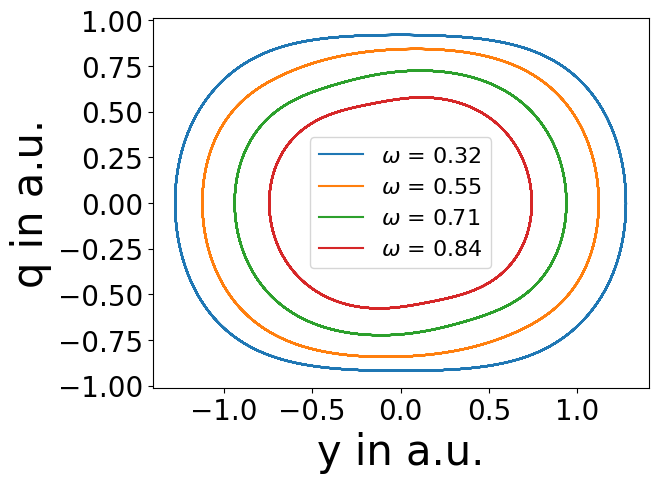

In [60]:
par0 = 3,3,3,3
for j in np.arange(0.1, 0.8, 0.2):
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]
    ysol = sol[-keep:, 1]
    qsol = sol[-keep:, 3]
    plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(j), 2)))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

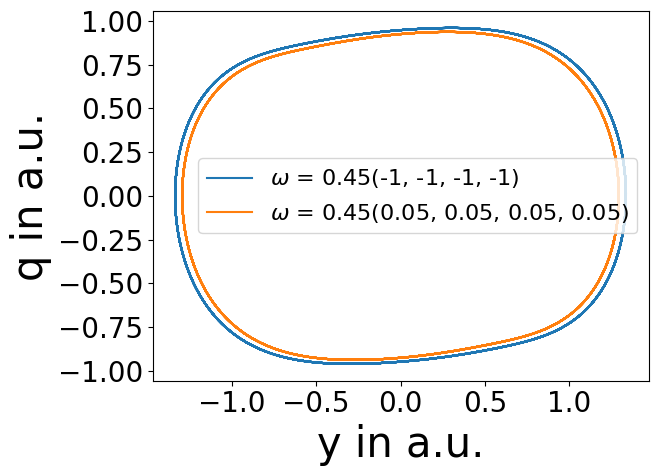

In [ ]:
par0 = -1, -1, -1, -1
alph = 0.2

sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[-keep:, 1]
qsol = sol[-keep:, 3]

par1 = 0.05,0.05,0.05,0.05

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[-keep:, 1]
qsol1 = sol1[-keep:, 3]
plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(alph),2)) + str(par0))
plt.plot(ysol1,qsol1, label = "$\\omega$ = " + str(round(np.sqrt(alph), 2))+ str(par1))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Einzugsbereich (Basin of Attraction)

1.2767844328526952
[[1.28 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [1.28 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [0.37 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [0.37 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [0.37 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [0.37 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [0.37 0.37 0.37 0.37 0.37 0.37 0.37 0.37]
 [0.37 0.37 0.37 0.37 0.37 0.37 0.37 0.37]]
[[1.27678412 0.37316995 0.37316995 0.37316785 0.37316793 0.37316791
  0.37316786 0.37316789]
 [1.27678419 0.37316786 0.37316792 0.37317013 0.37317013 0.37316785
  0.37316791 0.37316793]
 [0.37316787 0.37317013 0.37316794 0.37316791 0.37316792 0.37316792
  0.37316785 0.37316785]
 [0.37317013 0.37317013 0.37316792 0.37316995 0.37316786 0.37316995
  0.37316791 0.37316995]
 [0.37316785 0.37316785 0.37317013 0.37316995 0.37316792 0.37316792
  0.37316995 0.37316995]
 [0.37317013 0.37316787 0.37316995 0.37316792 0.37316792 0.37317013
  0.37316793 0.3731679 ]
 [0.37316995 0.37316793 0.37316794 0.37316995 0.37316791 0.37316792
  0.373167

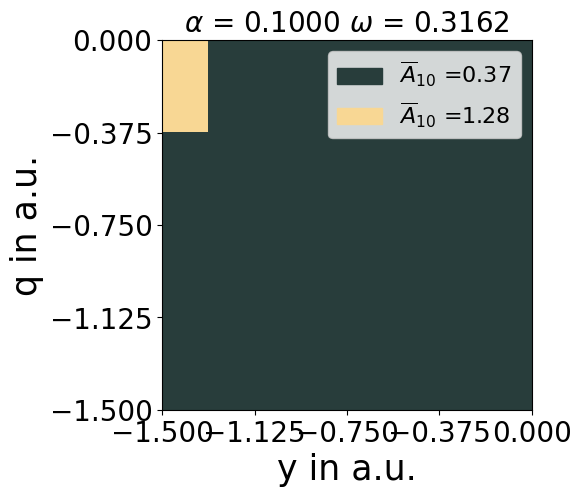

In [31]:
alph = [0.1]
colours = ["#283D3B", "#F8D794"]
cmap = ListedColormap(colours)

for i in alph:
    x_par = 1
    y_par = np.arange(-1.5,0,0.2)
    p_par = 1
    q_par = np.arange(-1.5,0,0.2)
  

    y,p = np.meshgrid(y_par,q_par)
    attractor = np.zeros_like(y)
    y_amplitude_matrix = np.zeros_like(y)
    par0 = -1, -1, -1, -1

    sol = max(OnesidedCoupling(par0, t, keep, k, mu, gamma, i, beta).duffvdpsolver()[-keep:, 1])

    for l in range(len(q_par)):
        for m in range(len(y_par)):

            par0 = [x_par, y_par[m], p_par, q_par[l]]
            y_amplitude = compute_amplitude(par0, t, keep, 0.1, 2, 0.2, i, 0.5)
            y_amplitude_matrix[l,m] = round(y_amplitude, 2)
            attractor[l,m] = y_amplitude
            
    
    print(sol)
    print(y_amplitude_matrix)
    print(attractor)
    
    plt.imshow(attractor, extent=[-1.5,0,-1.5,0], cmap = cmap)
    plt.xlabel("y in a.u.",fontsize = 25)
    plt.ylabel("q in a.u.",fontsize = 25)
    plt.xticks(np.linspace(-1.5,0, 5), fontsize = 20)
    plt.yticks(np.linspace(-1.5,0, 5),fontsize = 20)
    
    labels = ["$\overline{A}_{10}$ =" + f"{attractor.min():.2f}", "$\overline{A}_{10}$ =" + f"{attractor.max():.2f}"]
    patches = [mpatches.Patch(color=colours[i], label=labels[i]) for i in range(len(colours))]
    plt.title(label = "$\\alpha$ = " + f"{i:.4f}" + " $\\omega$ = " + f"{np.sqrt(i):.4f}", fontsize = 20)

    plt.legend(handles=patches, loc='upper right', fontsize = 16)
    
    plt.show()
            


# Phaseplane

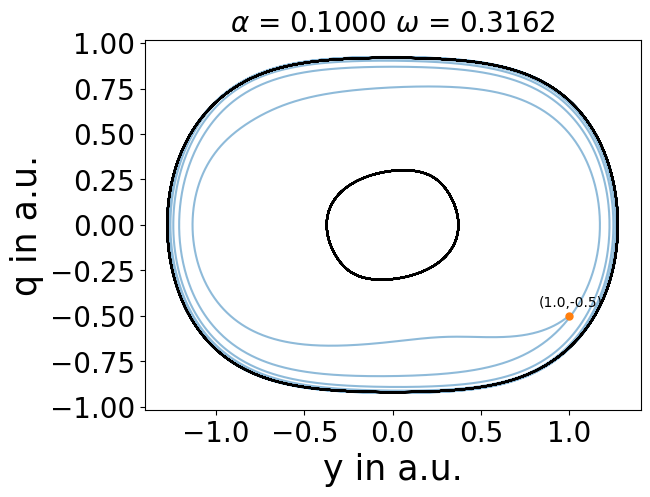

In [107]:
from pathlib import Path

alph = 0.1

par0 = 1,1,1,1
sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[-keep:, 1]
qsol = sol[-keep:, 3]

par1 = 0.1,0.1,0.1,0.1

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[-keep:, 1]
qsol1 = sol1[-keep:, 3]

par2 = 1,1,-0.5,-0.5

sol2 = OnesidedCoupling(par2, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol2 = sol2[:keep, 1]
qsol2 = sol2[:keep, 3]

par3 = 0.5,0.5,0.5,0.5

sol3 = OnesidedCoupling(par3, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol3 = sol3[:keep, 1]
qsol3 = sol3[:keep, 3]


par4 = 1,1,-1,-1

sol4 = OnesidedCoupling(par4, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol4 = sol4[:keep:, 1]
qsol4 = sol4[:keep, 3]




# plt.plot(ysol3,qsol3, label = str(par3), alpha = 0.5)
# plt.plot(ysol3[0],qsol3[0], "o", ms=5)
# plt.annotate("("+str(ysol3[0])+ "," + str(qsol3[0])+")", xy=(ysol3[0],qsol3[0]), xytext=(ysol3[0],qsol3[0] + 10),
#     textcoords='offset points',ha='center', va='center' )

# plt.plot(ysol4,qsol4, label = str(par4), alpha = 0.5)
# plt.plot(ysol4[0],qsol4[0], "o", ms=5)
# plt.annotate("("+str(ysol4[0])+ "," + str(qsol4[0])+")", xy=(ysol4[0],qsol4[0]), xytext=(ysol4[0],qsol4[0] + 10),
#     textcoords='offset points',ha='center', va='center' )


plt.plot(ysol2,qsol2, label = str(par2), alpha = 0.5)
plt.plot(ysol2[0],qsol2[0], "o", ms=5)

plt.plot(ysol,qsol, label = str(par0), color = "k")
plt.plot(ysol1,qsol1, label = str(par1), color = "k")
plt.annotate("("+str(ysol2[0])+ "," + str(qsol2[0])+")", xy=(ysol2[0],qsol2[0]), xytext=(ysol2[0],qsol2[0] + 10),
    textcoords='offset points',ha='center', va='center' )

plt.xlabel("y in a.u.",fontsize = 25)
plt.ylabel("q in a.u.",fontsize = 25)
# plt.legend( title = "Initial Values", title_fontsize='x-large', fontsize = 16, loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(label = "$\\alpha$ = " + f"{i:.4f}" + " $\\omega$ = " + f"{np.sqrt(i):.4f}", fontsize = 20)

plt.savefig("Trajectory_" + f"{round(alph,4)}" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

# Timeseries

(-3.5, 3.5)

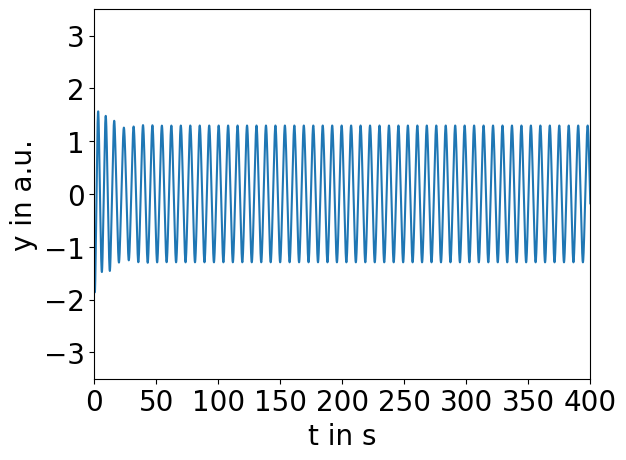

In [20]:
p = 1,-1.5,1,-1.5
plt.plot(t, OnesidedCoupling(p,  t, keep, k,mu, gamma, alph, beta).y_solv())
plt.xlabel("t in s", fontsize = 20)
plt.ylabel("y in a.u.", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim([0, 400])
plt.ylim([-3.5, 3.5])

In [124]:
p = 3,3,-3,-3
plt.plot(t, OnesidedCoupling(p,  t, keep, k, 2, gamma, 0.1, 0.5).y_solv())
plt.xlabel("t in s", fontsize = 20)
plt.ylabel("y in a.u.", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim([3500, 4000])
plt.ylim([-3.5, 3.5])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

# Initial Values

[[-2.  -2.  -2.  ... -2.  -2.  -2. ]
 [-1.9 -1.9 -1.9 ... -1.9 -1.9 -1.9]
 [-1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8]
 ...
 [ 1.7  1.7  1.7 ...  1.7  1.7  1.7]
 [ 1.8  1.8  1.8 ...  1.8  1.8  1.8]
 [ 1.9  1.9  1.9 ...  1.9  1.9  1.9]]
[[-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 ...
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]]
[[-2.  -2.  -2.  ... -2.  -2.  -2. ]
 [-1.9 -1.9 -1.9 ... -1.9 -1.9 -1.9]
 [-1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8]
 ...
 [ 1.7  1.7  1.7 ...  1.7  1.7  1.7]
 [ 1.8  1.8  1.8 ...  1.8  1.8  1.8]
 [ 1.9  1.9  1.9 ...  1.9  1.9  1.9]]
[[-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 ...
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]]


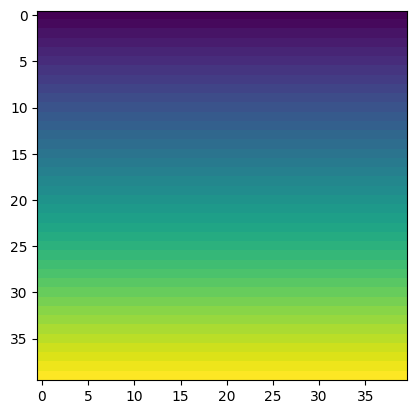

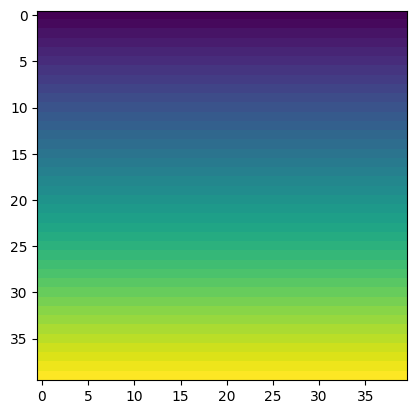

In [67]:
alph = [0.2]
colours = ["#283D3B", "#F8D794"]
cmap = ListedColormap(colours)

for i in alph:
    x_par = np.arange(-2,2,0.1)
    y_par = np.arange(-2,2,0.1)
    p_par = np.arange(-2,2,0.1)
    q_par = np.arange(-2,2,0.1)
  

    y,p = np.meshgrid(y_par,q_par)
    y_matrix = np.zeros_like(y)
    q_matrix = np.zeros_like(y)
    x_matrix= np.zeros_like(y)
    p_matrix = np.zeros_like(y)
    par0 = -1, -1, -1, -1

    for l in range(len(y_par)):
        for m in range(len(p_par)):

            y_matrix[l,m] = y_par[l]
            q_matrix[l,m] = q_par[m]
            x_matrix[l,m] = x_par[l]
            p_matrix[l,m] = p_par[m]
            
    
    print(y_matrix)
    print(q_matrix)
    print(x_matrix)
    print(p_matrix)
    plt.imshow(y_matrix)
    plt.show()
    plt.imshow(x_matrix)
    plt.show()
   


# Chaos?

In [112]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k_up = np.arange(0,5,0.1)
k_down = k_up[::-1]
gamma = 0.2
mu = 2
beta = 0.5
alpha = 0.1


In [118]:
par0 = -0.83424703, -5.20785553, -3.79697456, -7.95828013
amplitudes_chaos_up = []
amplitudes_chaos_down = []


for e in k_up:
    sol = OnesidedCoupling(par0, t, keep, e, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    print(par0)
    amplitudes_chaos_up.append(compute_amplitude(par0, t, keep, e, mu, gamma, alpha, beta))

paar0 = sol[-1]

for w in k_down:
    sol = OnesidedCoupling(par0, t, keep, w, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    print(par0)
    amplitudes_chaos_down.append(compute_amplitude(par0, t, keep, w, mu, gamma, alpha, beta))


[-1.59324168e+000 -2.18120572e-173  4.52401811e-001 -6.04067165e-174]


/Users/huyenanh/git_repos/daniel_model/env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/huyenanh/git_repos/daniel_model/env/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[ 1.06849363 -0.25281163  3.78073245 -0.24765389]
[ 1.56467378  1.47513652 -0.46540364  0.32486387]
[-1.28732837e+00 -7.31534027e-04 -3.53926050e+00 -9.56893175e-01]
[-1.5367222  -1.70616616  0.47871455  0.46296746]
[1.48536687 0.25342907 3.0902094  0.99296777]
[ 1.50802256  1.73970715 -0.49302564 -0.97252911]
[-1.65010855 -0.39281945 -2.51708228 -1.0454079 ]
[-1.47904508 -1.70485064  0.50817483  1.36581249]
[1.78059407 0.48981767 1.9084018  1.12510072]
[ 1.44832496  1.61823655 -0.52504479 -1.6719205 ]
[-1.87474877 -0.56484658 -1.36172866 -1.23649633]
[-1.41729034 -1.49499577  0.54297862  1.88912743]
[ 1.94083735 -0.17356544  0.90028301  0.85116162]
[ 1.38485619  2.51496418 -0.56272833 -1.87105975]
[-1.98276614 -2.0717539  -0.54621062 -1.03977882]
[-1.35111151 -1.20267363  0.58442429  0.18974027]
[ 2.00686908 -0.55501858  0.28476993  2.260983  ]
[ 1.31534922  1.12204571 -0.60875979 -3.44960693]
[-2.01794412 -1.99193017 -0.09683188 -0.80601614]
[-1.27806558 -1.37336863  0.63567415  0.34

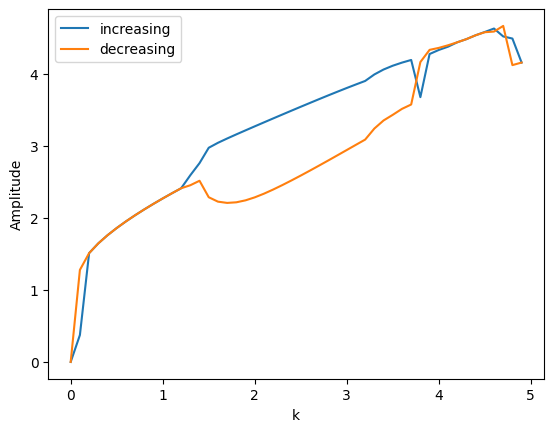

In [120]:

plt.plot(k_up, amplitudes_chaos_up, label = "increasing")
plt.plot(k_down, amplitudes_chaos_down, label = "decreasing")
plt.xlabel("k")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

[ 0.81602357 -1.2273391  -0.43916198  0.81853435 -1.23435525 -0.43442247
  0.78571352 -1.29079329 -0.4185368   0.34426087 -1.32180609 -0.46008706
  0.24925933 -1.0882861  -0.52674696  1.1402969   1.22357192  0.63061944
 -1.09437536  0.86477774 -0.53473032 -0.83687363 -0.50217904 -0.21287492
 -0.67687352 -0.78205544 -0.30871652  0.8374513  -1.20232011 -0.4530245
  0.89696551 -0.63669909 -0.80736218 -0.3886254   1.36659437  1.15381951
 -1.30135911 -0.42869153  0.07361658  0.42094753 -1.33368029 -1.08308012
  1.36106242  1.29942261  1.28576395  0.55452666 -1.12731971  0.89170438
 -0.10982555  1.18526693  1.23773432  0.99734191 -1.20594891  1.33915798
  1.27230605  1.28376664  0.74526588 -1.06887816  0.85792031 -0.63408972
 -0.80867291 -0.39513056  1.0555977  -1.1722158   1.134242    1.21622467
  0.55673428 -1.13030337  0.90124192  0.03541863  0.38866587 -1.34507325
 -0.71188882  0.67427731 -1.327083   -0.61776515  0.40824539 -1.34444747
 -0.58549408  0.3848165  -1.34031082 -0.52627627  0.

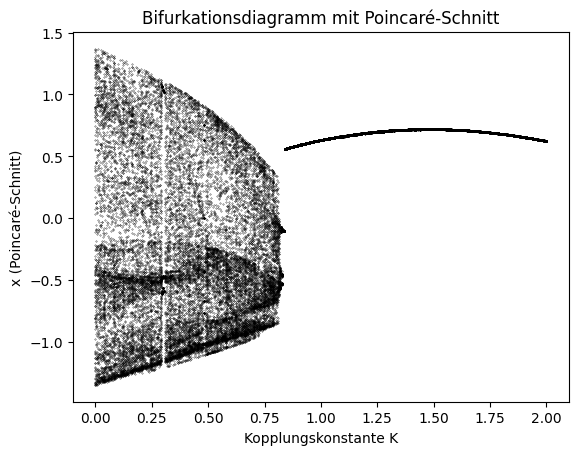

In [125]:
# Parameter
omega = 1.0
delta, alpha, beta, gamma, omega = 0.2, -1, 1, 0.3, 1
K_vals = np.linspace(0, 2, 500)
T = 2 * np.pi / omega
t_start = 200 * T   # Einschwingzeit
n_samples = 100     # Anzahl Poincaré-Punkte danach
times = t_start + np.arange(n_samples) * T
def duffing(t, y, delta, alpha, beta, gamma, omega, K):
    x, v = y
    dxdt = v
    dvdt = -delta*v - alpha*x - beta*x**3 + gamma*np.cos(omega*t) + K * coupling(x)
    return [dxdt, dvdt]

from scipy.integrate import solve_ivp

def coupling(x):  # Beispielkopplung
    return -x  # oder was dein Modell braucht

x_values = []

for K in K_vals:
    sol = solve_ivp(duffing, [0, times[-1]], [1, 0], t_eval=times,
                    args=(delta, alpha, beta, gamma, omega, K))
    x_sample = sol.y[0]
    x_values.append(x_sample)

# Plot
for i, K in enumerate(K_vals):
    print(x_values[i])
    plt.plot([K]*n_samples, x_values[i], 'k.', markersize=0.5)

plt.xlabel("Kopplungskonstante K")
plt.ylabel("x (Poincaré-Schnitt)")
plt.title("Bifurkationsdiagramm mit Poincaré-Schnitt")
plt.show()
